<a href="https://colab.research.google.com/github/uzhegovaelena/ecommerce_analysis/blob/main/e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data
The data includes product metadata, user metadata, and transactional data. The dataset contains over 40 thousand transactions, covering the period from June 30, 2016 to July 31, 2022.


##Research questions


Create a report to answer questions and add plots to visualize findings. Include:

- What are the sales compared to the previous period?
- What are the category sales compared to the previous period?
- What are the total sales for each payment method?
- What is the average unit price for each product line?
- What is the total purchase value by product line?

The Minimum Requirements for the Graded Task:
- Use Python data types: a list, a dictionary, an array, a dataframe.
- Use Python functions to work with a dataset: join, filter, delete elements, etc.
- Use Numpy and Pandas packages.
- Use at least one package for visualization: Matplotlib, Seaborn, Plotly.
- Use at least 3 different charts in your project.

### Descriptive analysis

#### import packages and data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
import datetime

In [40]:
# Mount my Google Drive in the Colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# import os

# path = '/content/drive/My Drive/Turing college/Tasks'
# files = os.listdir(path)
# print(files)

In [42]:
# Navigate to the directory where the Excel file is located 
customer = pd.read_csv('/content/drive/My Drive/Turing college/Tasks/Capstone project/customer_test.csv')
customer.sample(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
4572,102011,Farah,Melani,6e89e18a-aee4-42e1-8998-54f81b8da2aa,6e89e18a_aee4_42e1_8998_54f81b8da2aa@startupca...,NaN,1999-01-24,Android,c1730954-aa90-4a82-8006-00721adaa777,Android 8.1.0,NaN,NaN,NaN,NaN,2019-06-01
1548,104516,Keisha,Zulaika,2ca0434e-4450-486c-9f96-55df72cde011,2ca0434e_4450_486c_9f96_55df72cde011@zakyfound...,NaN,2010-01-30,Android,aea5009c-91ea-4e8d-bcf2-0f167560bbf7,Android 9,-7.636898,110.385491,Yogyakarta,Indonesia,2017-02-04


In [43]:
product = pd.read_csv('/content/drive/My Drive/Turing college/Tasks/Capstone project/new_product.csv')
product.sample(2)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
19944,31151,Boys,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,Gini and Jony Boys Printed Blue T-shirt
13294,16057,Men,Apparel,Bottomwear,Trousers,Brown,Fall,2011.0,Casual,Highlander Men Solid Brown Trouser


In [44]:
transactions = pd.read_csv('/content/drive/My Drive/Turing college/Tasks/Capstone project/transactions_test.csv')
transactions['total_usd'] = transactions.total_amount*0.000067
transactions.sample(2)

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,total_usd
1129,2020-06-07T22:06:21.789168Z,102131,0e706d07-7381-45b7-85fc-7b09390c7e43,90aa1a3b-634d-4d1d-ae36-19a658f6e82f,"[{'product_id': 44737, 'quantity': 1, 'item_pr...",Credit Card,Success,2618,WEEKENDMANTAP,10000.0,2020-06-12T20:05:59.219626Z,-1.814335,124.642809,175224.0,11.740008
34754,2022-06-29T19:34:09.019201Z,104661,b7d4afcd-2b82-4f3d-bad0-f10301fa391e,bdc9933c-5a30-44f6-bb3d-bae43b0b8415,"[{'product_id': 22018, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000.0,2022-07-02T15:42:58.154808Z,-7.413996,106.810663,NaN,NaN


#### transform data

In [45]:

#the ast.literal_eval() function to safely evaluate the string representation of the list and convert it into an actual list of dictionaries.
transactions['product_metadata'] = transactions['product_metadata'].apply(ast.literal_eval)

# Explode the 'product_metadata' column to create new rows
transactions = transactions.explode('product_metadata')

# Extract values into new columns
transactions['product_id'] = transactions['product_metadata'].apply(lambda x: x['product_id'])
transactions['quantity'] = transactions['product_metadata'].apply(lambda x: x['quantity'])

# transactions['item_price'] = transactions['product_metadata'].apply(lambda x: x['item_price'])

def get_product_id(metadata):
    return metadata['item_price']

transactions['item_price'] = transactions['product_metadata'].apply(get_product_id)
idr_to_usd = 0.000067

transactions['item_price_usd'] = transactions.item_price*idr_to_usd

transactions.drop('product_metadata', axis=1, inplace=True)


transactions.head(1)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,total_usd,product_id,quantity,item_price,item_price_usd
0,2017-02-01T23:06:50.716201Z,104555,97df3fe2-3efc-429a-aff6-ccecf5306c31,90acade1-9dbb-464b-82a9-f9332625d225,NaN,Success,3443,BUYMORE,0.0,2017-02-06T19:36:48.649046Z,-5.473218,105.608432,758102.0,50.792834,55170,1,246915,16.543305


In [46]:
data = pd.merge(customer, transactions, on='customer_id')
data.head(3)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,...,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,total_usd,product_id,quantity,item_price,item_price_usd
0,102130,Tania,Winarsih,dfa5266c-fcfc-4836-9757-4e6df5740200,dfa5266c_fcfc_4836_9757_4e6df5740200@zakyfound...,F,1998-12-15,Android,e64c3caf-e1b8-4311-b28c-cae99040910a,Android 2.0.1,...,NaN,NaN,NaN,NaN,253341.0,16.973847,9776,1,243341,16.303847
1,102130,Tania,Winarsih,dfa5266c-fcfc-4836-9757-4e6df5740200,dfa5266c_fcfc_4836_9757_4e6df5740200@zakyfound...,F,1998-12-15,Android,e64c3caf-e1b8-4311-b28c-cae99040910a,Android 2.0.1,...,10000.0,2021-09-19T00:43:16.592883Z,-8.038432,110.635506,231118.0,15.484906,6091,1,221118,14.814906
2,104146,Wulan,Namaga,d74f670f-b9cf-4586-aca5-e11057285126,d74f670f_b9cf_4586_aca5_e11057285126@startupca...,F,2000-10-16,Android,4266d8b3-6820-4124-b8aa-d8fff5bf2646,Android 4.1.2,...,NaN,NaN,NaN,NaN,227779.0,15.261193,48684,1,212779,14.256193


In [47]:
product = pd.DataFrame(product) 
data_new = pd.merge(product, data, left_on='id', right_on='product_id')
data_new.head(3)


,id,gender_x,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,total_usd,product_id,quantity,item_price,item_price_usd
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,NaN,NaN,NaN,NaN,NaN,NaN,15970,1,132122,8.852174
1,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,10000.0,2021-07-11T13:19:46.952374Z,-5.212964,105.676584,NaN,NaN,15970,1,474307,31.778569
2,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,0.0,2018-12-06T10:39:28.594161Z,-7.518984,110.451087,NaN,NaN,15970,1,478983,32.091861


In [48]:
data_new['birthdate'] = pd.to_datetime(data_new['birthdate'])
data_new['age'] = datetime.datetime.now().year - data_new['birthdate'].dt.year

#time of transaction 

# data_new.head(1)


In [49]:
data_new.rename(columns={'gender_x': 'category_gender', 'gender_y': 'customer_gender'}, inplace=True)


#### Describe data

In [50]:
data_new.head(1)


,id,category_gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,total_usd,product_id,quantity,item_price,item_price_usd,age
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,...,NaN,NaN,NaN,NaN,NaN,15970,1,132122,8.852174,30


In [51]:
data_new.sample(2)


,id,category_gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,total_usd,product_id,quantity,item_price,item_price_usd,age
37649,31147,Boys,Apparel,Topwear,Shirts,Blue,Summer,2012.0,Casual,Gini and Jony Boys Check Blue Shirt,...,2018-06-06T23:00:09.340087Z,-1.346215,111.548384,138088.0,9.251896,31147,1,137839,9.235213,22
40693,59777,Women,Accessories,Jewellery,Bracelet,Gold,Winter,2016.0,Casual,Estelle Women Gold Bracelet,...,NaN,NaN,NaN,NaN,NaN,59777,2,75555,5.062185,23


In [52]:
data_new.tail(1)


,id,category_gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,total_usd,product_id,quantity,item_price,item_price_usd,age
63466,51623,Women,Accessories,Watches,Watches,Pink,Winter,2016.0,Casual,Fossil Women Pink Dial Chronograph Watch ES3050,...,NaN,NaN,NaN,903528.0,60.536376,51623,4,223382,14.966594,22


In [53]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63467 entries, 0 to 63466
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      63467 non-null  int64         
 1   category_gender         63467 non-null  object        
 2   masterCategory          63467 non-null  object        
 3   subCategory             63467 non-null  object        
 4   articleType             63467 non-null  object        
 5   baseColour              63446 non-null  object        
 6   season                  63436 non-null  object        
 7   year                    63467 non-null  float64       
 8   usage                   63000 non-null  object        
 9   productDisplayName      63461 non-null  object        
 10  customer_id             63467 non-null  int64         
 11  first_name              63467 non-null  object        
 12  last_name               63467 non-null  object

In [54]:
data_new.describe(include=['int64', 'float64']).round(2).T

,count,mean,std,min,25%,50%,75%,max
id,63467.0,29735.53,17027.63,1164.00,14841.00,28602.00,44677.00,60000.00
year,63467.0,2012.82,2.13,2007.00,2011.00,2012.00,2015.00,2019.00
customer_id,63467.0,102487.34,1464.63,100000.00,101229.00,102443.00,103774.00,105000.00
home_location_lat,46233.0,-5.02,3.24,-10.15,-7.43,-6.25,-3.08,5.47
home_location_long,46233.0,111.36,6.80,95.64,106.86,110.16,113.36,140.84
promo_amount,63467.0,2052.37,3044.71,0.00,0.00,0.00,4043.00,21495.00
shipment_fee,28884.0,9908.08,9373.22,0.00,5000.00,10000.00,10000.00,50000.00
shipment_location_lat,28884.0,-5.12,3.10,-10.86,-7.40,-6.25,-3.13,5.68
shipment_location_long,28884.0,111.09,6.48,95.10,106.87,110.18,113.17,141.00
total_amount,41027.0,1168205.69,1728668.67,8624.00,246279.00,448958.00,1327056.00,13676534.00


In [55]:
# Check missing values
data_new[:].isnull().sum()

id                            0
category_gender               0
masterCategory                0
subCategory                   0
articleType                   0
baseColour                   21
season                       31
year                          0
usage                       467
productDisplayName            6
customer_id                   0
first_name                    0
last_name                     0
username                      0
email                         0
customer_gender           18220
birthdate                     0
device_type                6514
device_id                     0
device_version             6514
home_location_lat         17234
home_location_long        17234
home_location             17234
home_country              17234
first_join_date               0
created_at                    0
booking_id                    0
session_id                    0
payment_method            22043
payment_status                0
promo_amount                  0
promo_co

### Analysis

In [56]:
total_sales = round(transactions['total_usd'].sum(),2)

total_sales

3212148.01

In [57]:
#@title # Filter the data for the desired date ranges
ytd_start_date = '2021-08-01'
ytd_end_date = '2022-07-31'
prev_start_date = '2020-08-01'
prev_end_date = '2021-07-31'

ytd_data = data_new[(data_new['created_at'] >= ytd_start_date) & (data_new['created_at'] <= ytd_end_date)]
prev_data = data_new[(data_new['created_at'] >= prev_start_date) & (data_new['created_at'] <= prev_end_date)]

In [58]:
ytd_data.describe(include=['int64', 'float64']).round(2).T

,count,mean,std,min,25%,50%,75%,max
id,24179.0,29634.40,17034.42,1164.00,14787.50,28469.00,44491.00,60000.00
year,24179.0,2012.81,2.13,2007.00,2011.00,2012.00,2015.00,2019.00
customer_id,24179.0,102509.53,1476.60,100001.00,101229.00,102506.00,103788.00,104999.00
home_location_lat,17328.0,-5.00,3.20,-10.15,-7.35,-6.25,-3.06,5.47
home_location_long,17328.0,111.01,6.41,95.64,106.85,109.99,112.83,140.84
promo_amount,24179.0,1771.97,2920.86,0.00,0.00,0.00,3445.50,21495.00
shipment_fee,10923.0,9943.70,9325.30,0.00,5000.00,10000.00,10000.00,50000.00
shipment_location_lat,10923.0,-5.13,3.07,-10.86,-7.37,-6.25,-3.14,5.28
shipment_location_long,10923.0,110.91,6.33,95.92,106.86,110.09,112.90,141.00
total_amount,15708.0,1226253.31,1788220.77,8624.00,247059.50,456482.00,1413471.00,13508479.00


In [78]:
#@title What are the sales compared to the previous period?

# Calculate the total number of sales for the YTD period
total_sales_ytd = ytd_data['total_usd'].nunique()

# Calculate the total number of sales for the previous period
total_sales_prev = prev_data['total_usd'].nunique()

# Calculate the percentage increase/decrease in total sales
percentage_change = round(((total_sales_ytd - total_sales_prev) / total_sales_prev) * 100,2)

print(f"Total sales YTD: ${total_sales_ytd}")
print(f"Total sales previous period: ${total_sales_prev}")
print(f"Percentage change: {percentage_change}%")

Total sales YTD: $10213
Total sales previous period: $6767
Percentage change: 50.92%


In [60]:
#@title What are the category sales compared to the previous period?

# Calculate the YTD and previous period total sales for each category
ytd_sales = ytd_data.groupby('masterCategory')['total_usd'].sum()
prev_sales = prev_data.groupby('masterCategory')['total_usd'].sum()

# Create a dataframe with the comparison results and merge Dataframes
df_comparison = pd.DataFrame({'masterCategory': ytd_sales.index})
df_comparison = df_comparison.merge(ytd_sales, how='left', left_on='masterCategory', right_index=True)
df_comparison = df_comparison.merge(prev_sales, how='left', left_on='masterCategory', right_index=True)
df_comparison = df_comparison.rename(columns={'total_usd_x': 'ytd_total_sales', 'total_usd_y': 'prev_total_sales'})

# Fill missing values in prev_total_sales with 0
df_comparison['prev_total_sales'] = df_comparison['prev_total_sales'].fillna(0)

df_comparison['percentage_change'] = round(((df_comparison['ytd_total_sales'] - df_comparison['prev_total_sales']) / df_comparison['prev_total_sales']) * 100, 2)

# Replace 'inf' with a specific value (e.g., 0)
df_comparison.replace([np.inf, -np.inf], 0, inplace=True)

df_comparison = df_comparison.sort_values('ytd_total_sales', ascending=False)

df_comparison.head(10)

,masterCategory,ytd_total_sales,prev_total_sales,percentage_change
1,Apparel,600779.487072,374262.139762,60.52
0,Accessories,338406.855798,201965.550467,67.56
2,Footwear,282544.238931,149726.842665,88.71
5,Personal Care,65112.455632,38710.334596,68.20
3,Free Items,3034.190542,1757.830760,72.61
6,Sporting Goods,665.895245,318.219113,109.26
4,Home,10.000822,0.000000,0.00


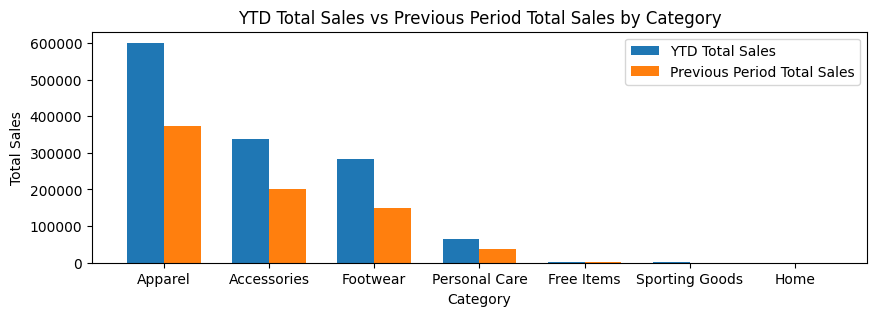

In [61]:
# Define the bar width
bar_width = 0.35

# Set the x-axis positions for the bars
x_pos = np.arange(len(df_comparison))

# Plotting the bar chart
plt.figure(figsize=(10, 3))
plt.bar(x_pos, df_comparison['ytd_total_sales'], width=bar_width, label='YTD Total Sales')
plt.bar(x_pos + bar_width, df_comparison['prev_total_sales'], width=bar_width, label='Previous Period Total Sales')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('YTD Total Sales vs Previous Period Total Sales by Category')

# Adding x-axis tick labels
plt.xticks(x_pos + bar_width / 2, df_comparison['masterCategory'])

# Adding legend
plt.legend()

# Displaying the chart
plt.show()

- Total sales increased YTD compared to the previous period +50.92%
- Top 3 categories: Apparel, Accessories, Footwear
- Total Footwear category sales increased YTD compared to the previous period +88.71%
- Total Accessories category sales increased YTD compared to the previous period +67.56%
- Total Apparel category sales increased YTD compared to the previous period +60.52%


In [62]:
#@title total amount visualisation
fig = px.box(ytd_data, x="masterCategory", y="total_usd",  
             points="all",
             labels={
                 "total_usd": "total sales, usd",
                 "masterCategory": "Category"
             })
fig.update_traces(quartilemethod="exclusive")

fig.show()

In [63]:
#@title quantity visualisation
fig = px.box(ytd_data, x="masterCategory", y="quantity",points="all",
             labels={
                     "quantity": "quantity",
                     "masterCategory": "Category"
                 },)
fig.update_traces(quartilemethod="exclusive")

fig.show()

In [64]:
#@title What are the payment method sales compared to the previous period?

# Calculate the YTD and previous period total sales for each category
ytd_payment = ytd_data.groupby('payment_method')['total_usd'].sum()
prev_payment = prev_data.groupby('payment_method')['total_usd'].sum()

# Create a dataframe with the comparison results and merge Dataframes
df_comp_pay = pd.DataFrame({'payment_method': ytd_payment.index})
df_comp_pay = df_comp_pay.merge(ytd_payment, how='left', left_on='payment_method', right_index=True)
df_comp_pay = df_comp_pay.merge(prev_payment, how='left', left_on='payment_method', right_index=True)
df_comp_pay = df_comp_pay.rename(columns={'total_usd_x': 'ytd_total_sales', 'total_usd_y': 'prev_total_sales'})

# Fill missing values in prev_total_sales with 0
df_comp_pay['prev_total_sales'] = df_comp_pay['prev_total_sales'].fillna(0)

df_comp_pay['percentage_change'] = round(((df_comp_pay['ytd_total_sales'] - df_comp_pay['prev_total_sales']) / df_comp_pay['prev_total_sales']) * 100, 2)

# Replace 'inf' with a specific value (e.g., 0)
df_comp_pay.replace([np.inf, -np.inf], 0, inplace=True)

df_comp_pay = df_comp_pay.sort_values('ytd_total_sales', ascending=False)

df_comp_pay.head(10)

,payment_method,ytd_total_sales,prev_total_sales,percentage_change
0,Credit Card,291946.214998,183868.755327,58.78
2,Gopay,181866.294167,100215.522623,81.48
1,Debit Card,150661.637251,66916.889783,125.15
4,OVO,147750.050277,118555.155645,24.63
3,LinkAja,52504.704971,31900.081808,64.59


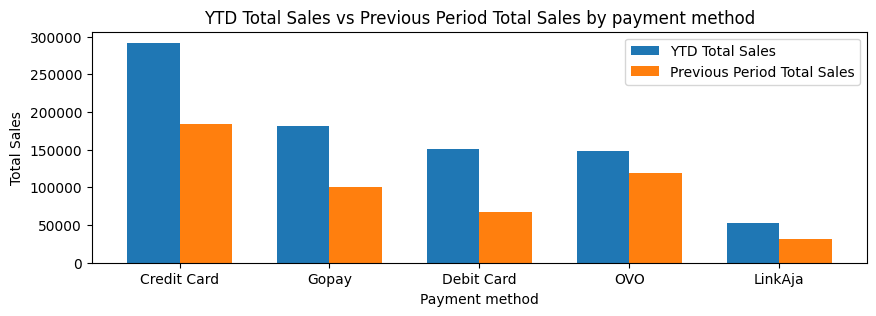

In [65]:
# Define the bar width
bar_width = 0.35

# Set the x-axis positions for the bars
x_pos = np.arange(len(df_comp_pay))

# Plotting the bar chart
plt.figure(figsize=(10, 3))
plt.bar(x_pos, df_comp_pay['ytd_total_sales'], width=bar_width, label='YTD Total Sales')
plt.bar(x_pos + bar_width, df_comp_pay['prev_total_sales'], width=bar_width, label='Previous Period Total Sales')

# Adding labels and title
plt.xlabel('Payment method')
plt.ylabel('Total Sales')
plt.title('YTD Total Sales vs Previous Period Total Sales by payment method')

# Adding x-axis tick labels
plt.xticks(x_pos + bar_width / 2, df_comp_pay['payment_method'])

# Adding legend
plt.legend()

# Displaying the chart
plt.show()

- The most popular payment methods are Credit Cards and Gopay YTD
- Credit card sales increased YTD compared to the previous period +58.78%
- Gopay sales increased YTD compared to the previous period +81.48%

In [66]:
#@title What is the average unit price for each product line?

# Group by 'category' and calculate mean unit price
avg_item_price = round(
    ytd_data.groupby('masterCategory')[['item_price_usd']].mean(), 2)

# Reset the index to make 'category' a column
avg_item_price = avg_item_price.reset_index()

avg_item_price

,masterCategory,item_price_usd
0,Accessories,16.65
1,Apparel,16.66
2,Footwear,16.77
3,Free Items,17.18
4,Home,15.83
5,Personal Care,16.48
6,Sporting Goods,16.27


In [67]:
#@title price visualisation
fig = px.box(ytd_data, x="masterCategory", y="item_price_usd",points="all",
             labels={
                     "item_price_usd": "Price",
                     "masterCategory": "Category"
                 },)
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [68]:
#@title Total customers YTD

# Calculate the total number of customers for the YTD period
total_customers_ytd = ytd_data['customer_id'].nunique()

# Calculate the total number of customers for the previous period
total_customers_prev = prev_data['customer_id'].nunique()

# Calculate the percentage increase/decrease in total customers
percentage_change = round(((total_customers_ytd - total_customers_prev) / total_customers_prev) * 100,2)

# Print the results
print(f"Total customers YTD: {total_customers_ytd}")
print(f"Total customers previous period: {total_customers_prev}")
print(f"Percentage change: {percentage_change}%")

Total customers YTD: 1945
Total customers previous period: 1659
Percentage change: 17.24%


In [69]:
print(data_new['age'].dtype)
data_new['age'] = data_new['age'].astype(str)
print(data_new['age'].unique())

int64
['30' '51' '37' '19' '28' '34' '17' '32' '35' '24' '26' '22' '20' '25'
 '27' '33' '18' '31' '29' '14' '39' '23' '21' '16' '40' '36' '12' '44'
 '38' '43' '47' '60' '11' '55' '42' '41' '52' '13' '15' '9' '45' '46' '49'
 '50' '48' '10' '57' '54']


In [70]:
count_ids = ytd_data[ytd_data['quantity'] > 1].groupby('masterCategory')['id'].count()
count_ids

masterCategory
Accessories       1034
Apparel           1927
Footwear           864
Free Items          10
Personal Care      227
Sporting Goods       2
Name: id, dtype: int64

- The total number of customers increased YTD compared to the previous period +17.24%

In [71]:
#@title What are the gender sales compared to the previous period?

ytd_gender = ytd_data.groupby('customer_gender')['total_usd'].sum()
prev_gender = prev_data.groupby('customer_gender')['total_usd'].sum()

# Create a dataframe with the comparison results and merge Dataframes
df_comp_gender = pd.DataFrame({'customer_gender': ytd_gender.index})
df_comp_gender = df_comp_gender.merge(ytd_gender, how='left', left_on='customer_gender', right_index=True)
df_comp_gender = df_comp_gender.merge(prev_gender, how='left', left_on='customer_gender', right_index=True)
df_comp_gender = df_comp_gender.rename(columns={'total_usd_x': 'ytd_total_sales', 'total_usd_y': 'prev_total_sales'})

# Fill missing values in prev_total_sales with 0
df_comp_gender['prev_total_sales'] = df_comp_gender['prev_total_sales'].fillna(0)

df_comp_gender['percentage_change'] = round(((df_comp_gender['ytd_total_sales'] - df_comp_gender['prev_total_sales']) / df_comp_gender['prev_total_sales']) * 100, 2)

# Replace 'inf' with a specific value (e.g., 0)
df_comp_gender.replace([np.inf, -np.inf], 0, inplace=True)

df_comp_gender = df_comp_gender.sort_values('ytd_total_sales', ascending=False)

df_comp_gender.head(10)

,customer_gender,ytd_total_sales,prev_total_sales,percentage_change
0,F,634521.655222,327803.235803,93.57
1,M,324198.333700,226333.283235,43.24


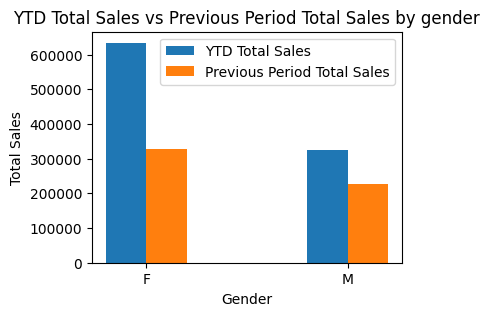

In [72]:
# Define the bar width
bar_width = 0.2

# Set the x-axis positions for the bars
x_pos = np.arange(len(df_comp_gender))

# Plotting the bar chart
plt.figure(figsize=(4, 3))
plt.bar(x_pos, df_comp_gender['ytd_total_sales'], width=bar_width, label='YTD Total Sales')
plt.bar(x_pos + bar_width, df_comp_gender['prev_total_sales'], width=bar_width, label='Previous Period Total Sales')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.title('YTD Total Sales vs Previous Period Total Sales by gender')

# Adding x-axis tick labels
plt.xticks(x_pos + bar_width / 2, df_comp_gender['customer_gender'])

# Adding legend
plt.legend()

# Displaying the chart
plt.show()

In [73]:
fig = px.box(ytd_data, x="customer_gender", y="total_usd",points="all",
             labels={
                     "total_usd": "total sales, usd",
                     "customer_gender": "Gender"
                 },)
fig.update_traces(quartilemethod="exclusive")

fig.show()

In [74]:
fig = px.box(ytd_data, x="customer_gender", y="item_price_usd",points="all",
             labels={
                     "item_price_usd": "Price",
                     "customer_gender": "Gender"
                 },)
fig.update_traces(quartilemethod="exclusive")

fig.show()

In [75]:
fig = px.box(ytd_data, x="customer_gender", y="quantity",points="all",
             labels={
                     "quantity": "quantity",
                     "customer_gender": "Gender"
                 },)
fig.update_traces(quartilemethod="exclusive")

fig.show()

<ipython-input-80-a67dd8e55bb9>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

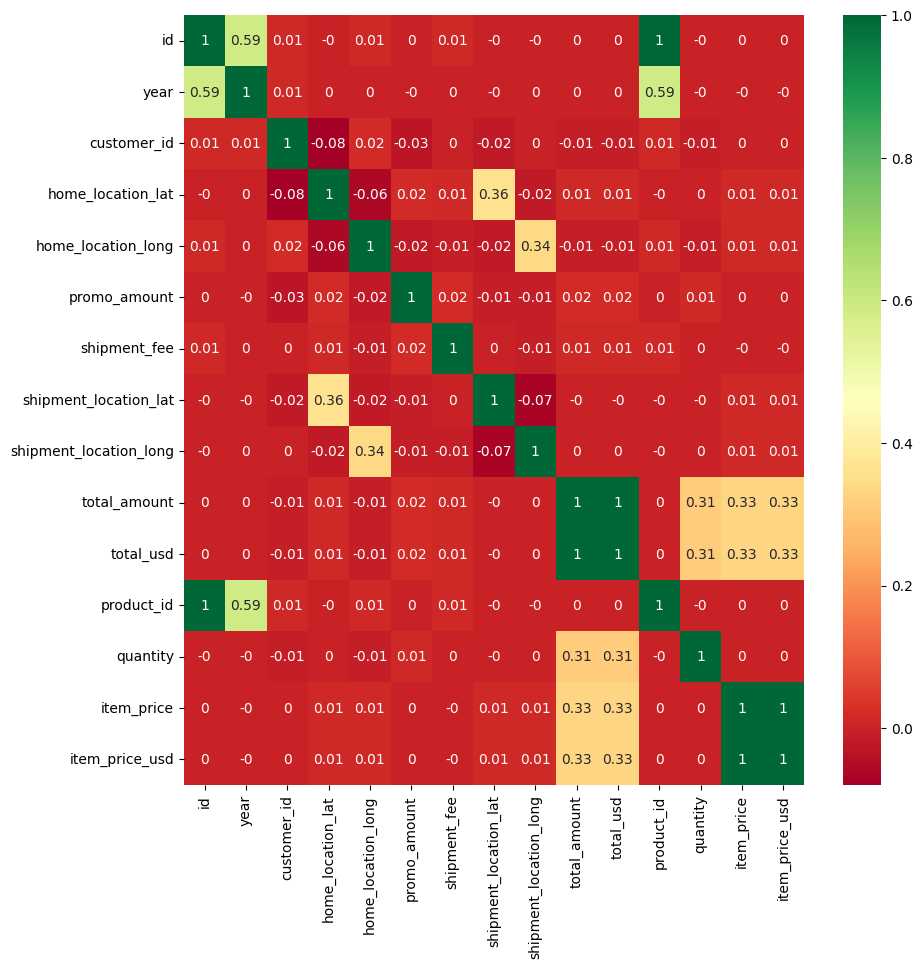

In [80]:
#@title Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(data_new.corr(method='spearman').round(2),annot=True,cmap='RdYlGn')

## Conclusion
- Total sales increased YTD compared to the previous period +50.92%
- Top 3 categories: Apparel, Accessories, Footwear
- Total Footwear category sales increased YTD compared to the previous period +88.71%
- Total Accessories category sales increased YTD compared to the previous period +67.56%
- Total Apparel category sales increased YTD compared to the previous period +60.52%
- The most popular payment methods are Credit Cards and Gopay YTD
- Credit card sales increased YTD compared to the previous period +58.78%
- Gopay sales increased YTD compared to the previous period +81.48%